# Problem 1:

In [1]:
import pandas as pd

df = pd.read_csv("Data/house price data/train.csv")

train_df = df[["GrLivArea","YearBuilt", "SalePrice"]]
train_df

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
...,...,...,...
1455,1647,1999,175000
1456,2073,1978,210000
1457,2340,1941,266500
1458,1078,1950,142125


# Problem 2:

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.array(train_df.loc[:,["GrLivArea","YearBuilt"]])
y = np.array(train_df["SalePrice"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1095, 2) (365, 2) (1095,) (365,)


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_trans = scaler.transform(X_train)
X_test_trans = scaler.transform(X_test)

X_train_trans
X_test_trans

array([[-1.30051802e+00,  1.07885187e+00],
       [ 8.98376388e-01,  5.82670034e-01],
       [-7.86667034e-01, -7.07402747e-01],
       [ 8.24692096e-01,  1.04577308e+00],
       [-4.93868925e-01, -3.76614855e-01],
       [ 1.96292051e+00,  7.81142770e-01],
       [-8.19631060e-01, -1.56745127e+00],
       [ 1.31721342e+00,  9.46536716e-01],
       [ 1.60031623e+00,  8.14221559e-01],
       [ 1.23771194e+00, -1.78142119e-01],
       [-1.08334326e+00, -2.11220908e-01],
       [-1.48716187e-01,  6.15748824e-01],
       [ 3.65134799e-01,  3.18039720e-01],
       [-2.90267591e-01, -1.53437248e+00],
       [-2.06887997e-01, -1.07126943e+00],
       [ 1.14657611e+00, -1.11984540e-01],
       [ 1.44081922e-01,  6.81906402e-01],
       [-2.72816048e-01, -1.43513611e+00],
       [-1.00771991e+00, -3.43536065e-01],
       [-8.15752939e-01, -5.42008801e-01],
       [ 4.05855066e-01, -2.44299698e-01],
       [-1.21132125e+00, -1.78142119e-01],
       [ 5.92004857e-01, -1.27481727e-02],
       [-3.

### Linear Regression

In [4]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train_trans, y_train)
regScore = reg.score(X_train_trans, y_train)
regPredict = reg.predict(X_test_trans)

result_reg = pd.DataFrame([regPredict, y_test], index=['Prediction', 'Actual value'])
print(f"The Model Score is: {regScore}")
result_reg


The Model Score is: 0.7055301300697236


,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
Prediction,145731.831914,250461.326867,115960.024627,261451.857681,142794.046066,315410.74644,86217.063912,285296.301573,296557.533715,244401.533501,...,319529.13967,224295.536905,323276.349043,135207.846808,283297.508588,121150.020868,246993.701017,178455.668157,127359.468066,220827.850995
Actual value,155900.000000,228500.000000,147000.000000,360000.000000,167500.000000,290000.00000,79000.000000,250000.000000,265000.000000,226000.000000,...,475000.00000,174000.000000,325000.000000,75000.000000,239686.000000,119500.000000,212000.000000,160200.000000,125000.000000,196500.000000


In [5]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, regPredict)

2838302032.735611

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_graph(xlabel, ylabel, X, y_true, y_pred):
    plt.title('Visualization between ' + xlabel + ' and ' + ylabel)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.scatter(X, y_true, label='true value')
    plt.scatter(X, y_pred, label='predicted value')
    plt.legend()
    plt.show()

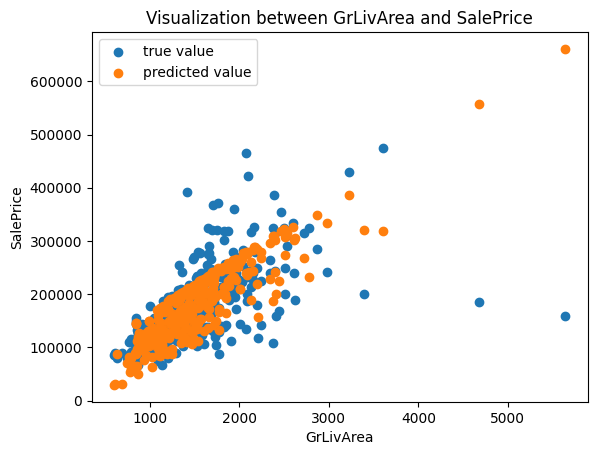

In [7]:
plot_graph('GrLivArea', 'SalePrice', X_test[:, 0], y_test, regPredict)

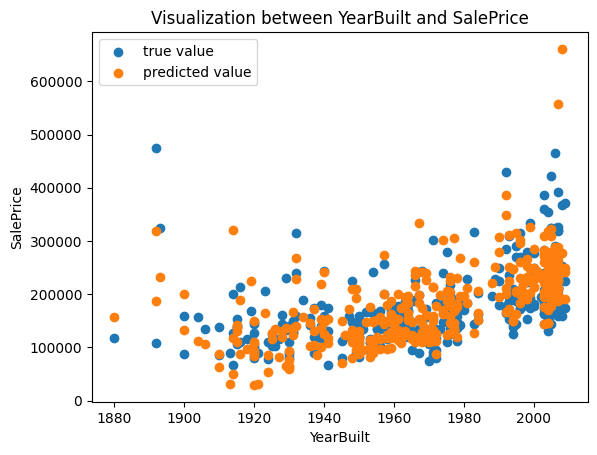

In [8]:
plot_graph('YearBuilt', 'SalePrice', X_test[:, 1], y_test, regPredict)

# Problem 3

In [23]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#### SVM:

In [24]:
svr = SVR
svr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
svr.fit(X_train_trans, y_train)
svr_predict = svr.predict(X_test_trans)

print("Mean Squared Error: ", mean_squared_error(y_test, svr_predict))

Mean Squared Error:  4843713486.238205


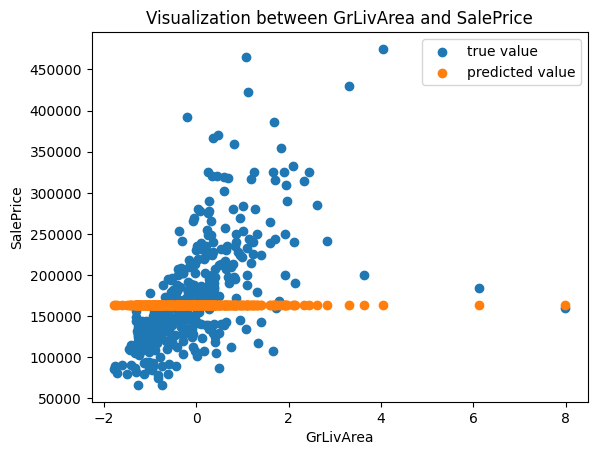

In [25]:
plot_graph('GrLivArea', 'SalePrice', X_test_trans[:, 0], y_test, svr_predict)

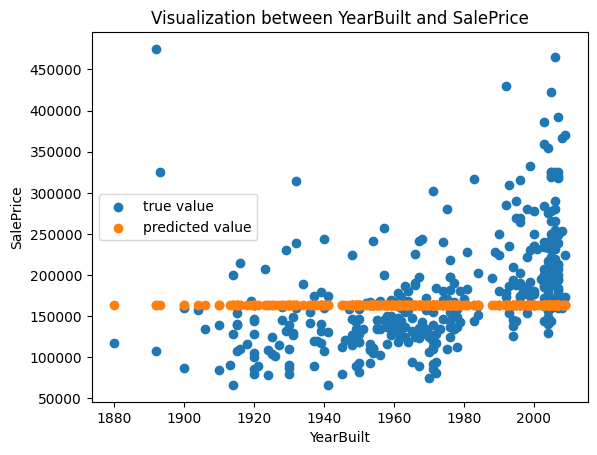

In [20]:
plot_graph('YearBuilt', 'SalePrice', X_test[:, 1], y_test, svr_predict)

#### Decision tree

In [26]:
d_tree = DecisionTreeRegressor()
d_tree.fit(X_train, y_train)
d_tree_predict = d_tree.predict(X_test)
print("Mean Squared Error: ",mean_squared_error(y_test, d_tree_predict))

Mean Squared Error:  4273616304.928767


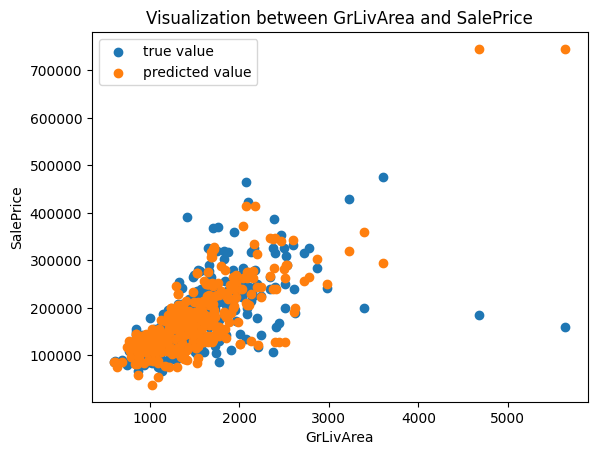

In [27]:
plot_graph('GrLivArea', 'SalePrice', X_test[:, 0], y_test, d_tree_predict)

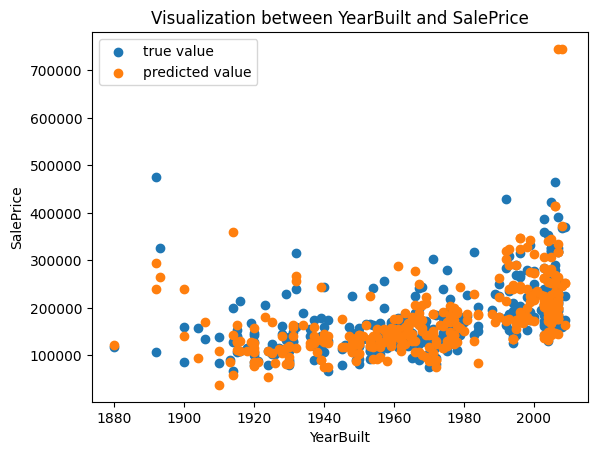

In [28]:
plot_graph('YearBuilt', 'SalePrice', X_test[:, 1], y_test, d_tree_predict)

#### Random forest

In [29]:
rand_forest = RandomForestRegressor()
rand_forest.fit(X_train, y_train)
rand_forest_predict = rand_forest.predict(X_test)
print("Mean Squared Error: ",mean_squared_error(y_test, rand_forest_predict))

Mean Squared Error:  2922626585.7413683


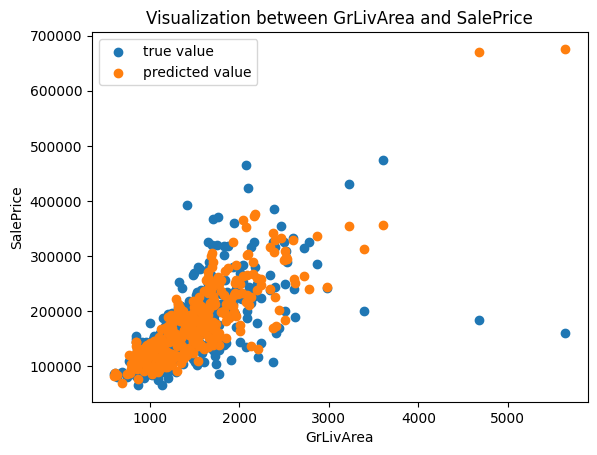

In [30]:
plot_graph('GrLivArea', 'SalePrice', X_test[:, 0], y_test, rand_forest_predict)

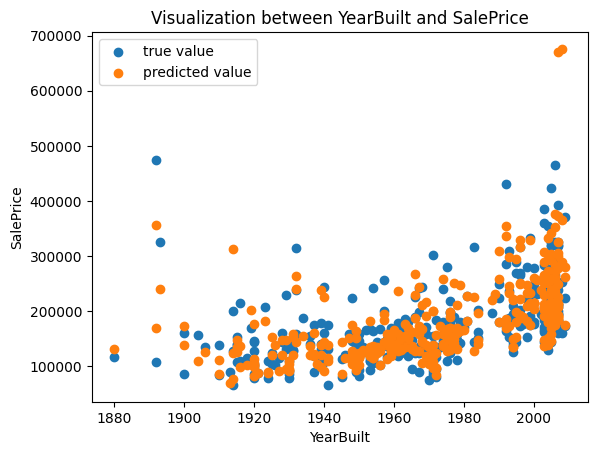

In [31]:
plot_graph('YearBuilt', 'SalePrice', X_test[:, 1], y_test, rand_forest_predict)

# Problem 4: (Advance assignment) Learning using other features

In [32]:
train_df1 = df[["GrLivArea","YearBuilt", "SalePrice", "LotArea", "YrSold"]]
train_df1
     

,GrLivArea,YearBuilt,SalePrice,LotArea,YrSold
0,1710,2003,208500,8450,2008
1,1262,1976,181500,9600,2007
2,1786,2001,223500,11250,2008
3,1717,1915,140000,9550,2006
4,2198,2000,250000,14260,2008
...,...,...,...,...,...
1455,1647,1999,175000,7917,2007
1456,2073,1978,210000,13175,2010
1457,2340,1941,266500,9042,2010
1458,1078,1950,142125,9717,2010


In [33]:
X = train_df1[["GrLivArea","YearBuilt", "LotArea", "YrSold"]].values
y = train_df1['SalePrice'].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

#### Linear regression

In [34]:
reg = LinearRegression().fit(X_train, y_train)
reg_predict = reg.predict(X_test)
pd.DataFrame([reg_predict, y_test])

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
0,192491.549851,141710.44548,294178.946807,144161.316151,133990.69771,102335.419475,132004.728141,151498.971758,127513.149736,141709.807426,...,116124.172671,251762.672123,136098.694288,118077.434506,231750.349915,212309.045332,112542.372336,108114.297868,213916.771721,189145.616135
1,150000.000000,132500.00000,290000.000000,162000.000000,102000.00000,135000.000000,154000.000000,144000.000000,158500.000000,154000.000000,...,189950.000000,219210.000000,148000.000000,125000.000000,193000.000000,136000.000000,112000.000000,89471.000000,223000.000000,153500.000000


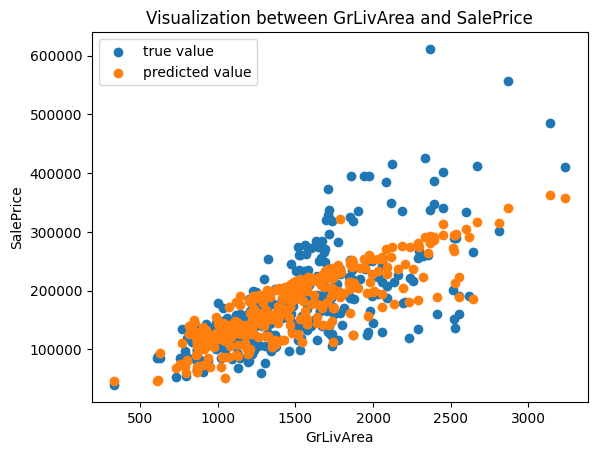

In [35]:
plot_graph('GrLivArea', 'SalePrice', X_test[:, 0], y_test, reg_predict)

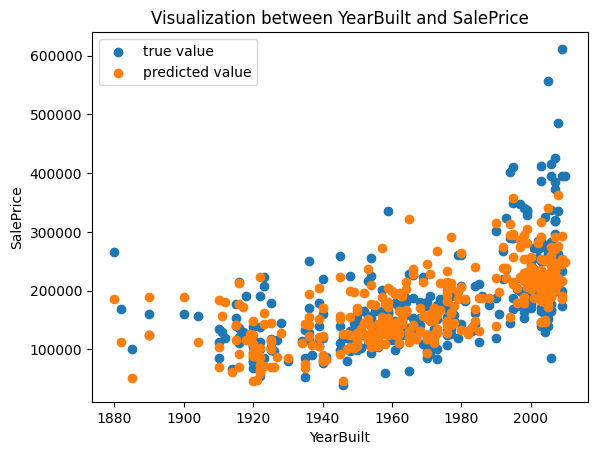

In [36]:
plot_graph('YearBuilt', 'SalePrice', X_test[:, 1], y_test, reg_predict)

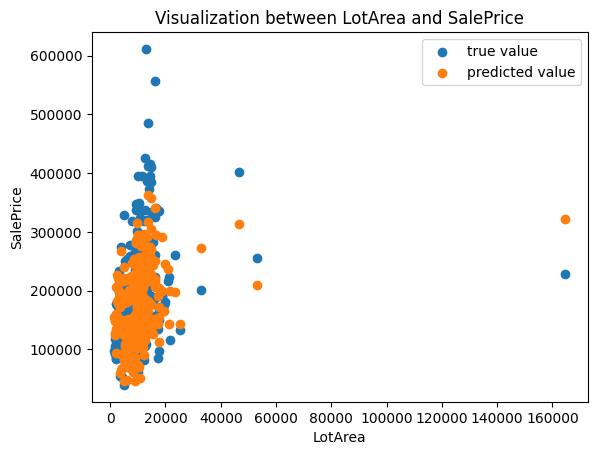

In [37]:
plot_graph('LotArea', 'SalePrice', X_test[:, 2], y_test, reg_predict)

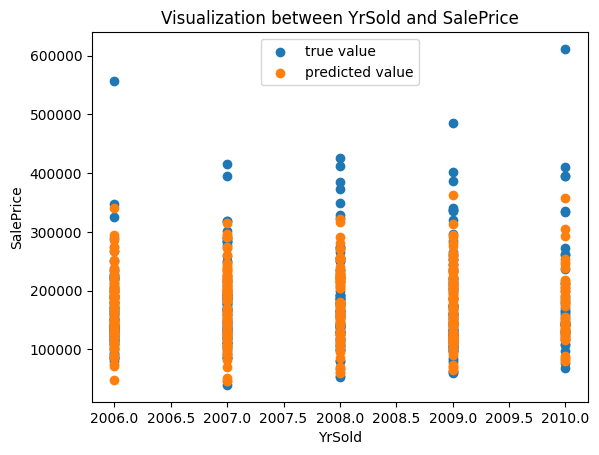

In [38]:
plot_graph('YrSold', 'SalePrice', X_test[:, 3], y_test, reg_predict)

#### SVM

In [39]:
svr = SVR()
svr.fit(X_train, y_train)
svr_predict = svr.predict(X_test)
print("Mean Squared Error: ",mean_squared_error(y_test, reg_predict))

Mean Squared Error:  2109552582.8655274


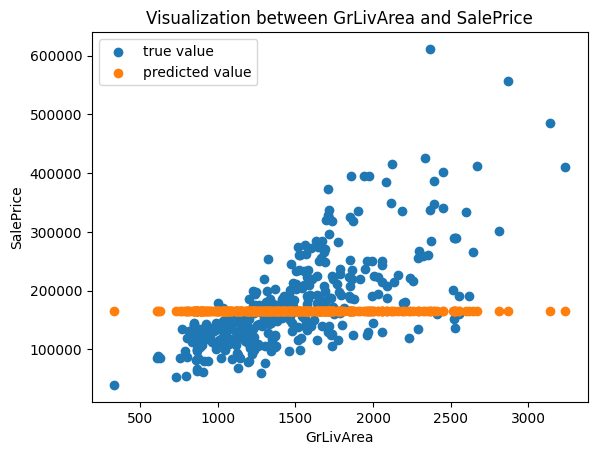

In [40]:
plot_graph('GrLivArea', 'SalePrice', X_test[:, 0], y_test, svr_predict)

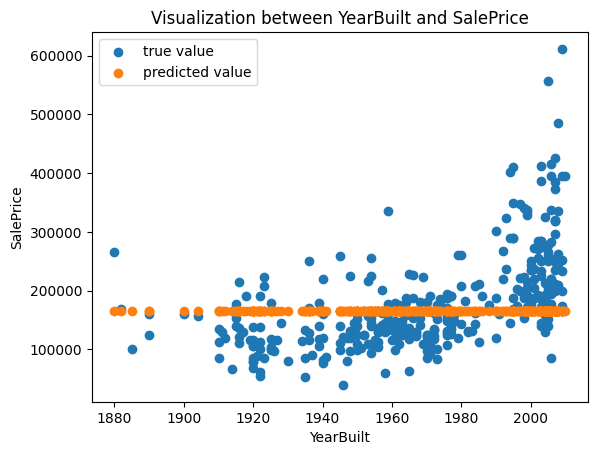

In [41]:
plot_graph('YearBuilt', 'SalePrice', X_test[:, 1], y_test, svr_predict)

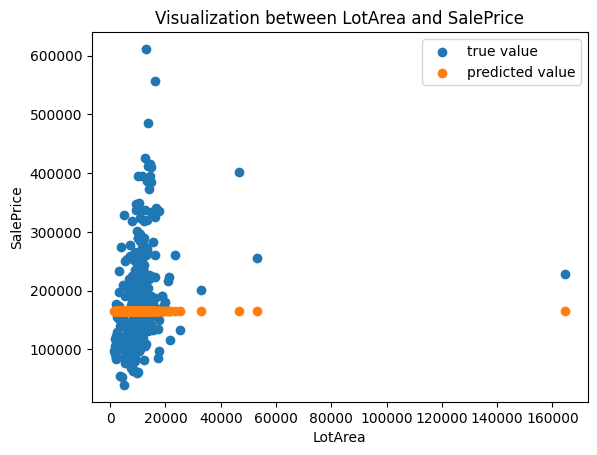

In [42]:
plot_graph('LotArea', 'SalePrice', X_test[:, 2], y_test, svr_predict)

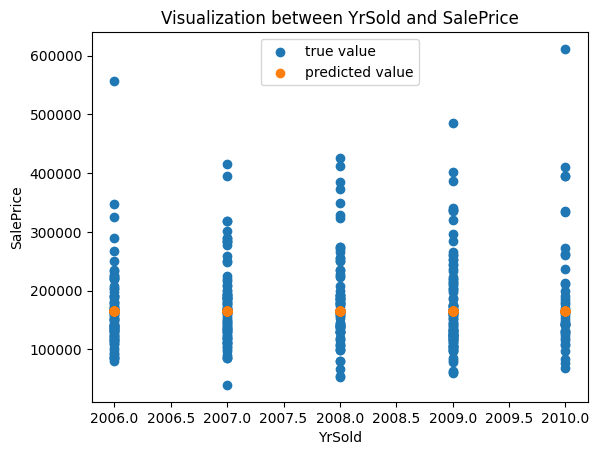

In [43]:
plot_graph('YrSold', 'SalePrice', X_test[:, 3], y_test, svr_predict)

#### Decision tree

In [44]:
d_tree = DecisionTreeRegressor()
d_tree.fit(X_train, y_train)
d_tree_predict = d_tree.predict(X_test)
print("Mean Squared Error: ",mean_squared_error(y_test, d_tree_predict))

Mean Squared Error:  2441949873.3945208


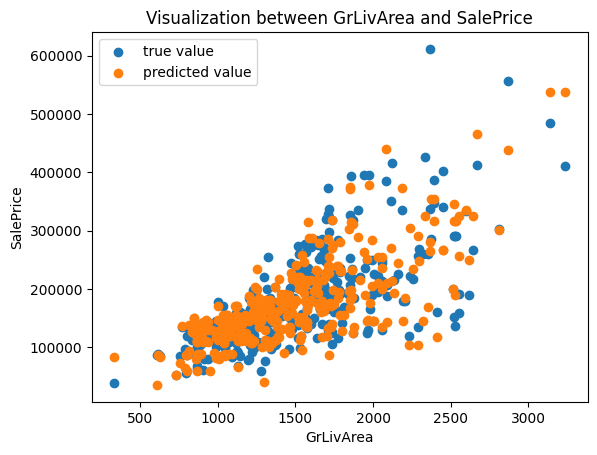

In [45]:
plot_graph('GrLivArea', 'SalePrice', X_test[:, 0], y_test, d_tree_predict)

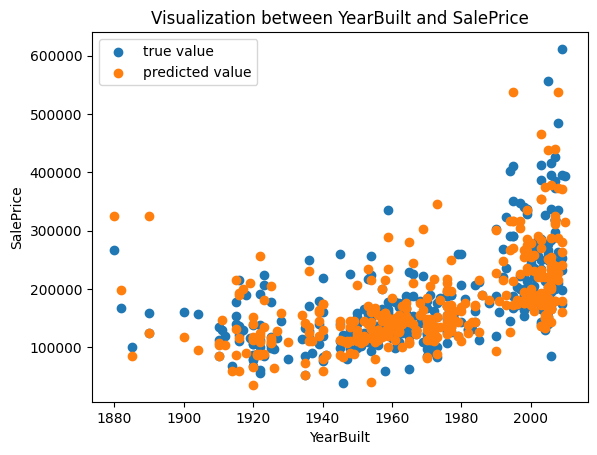

In [46]:
plot_graph('YearBuilt', 'SalePrice', X_test[:, 1], y_test, d_tree_predict)

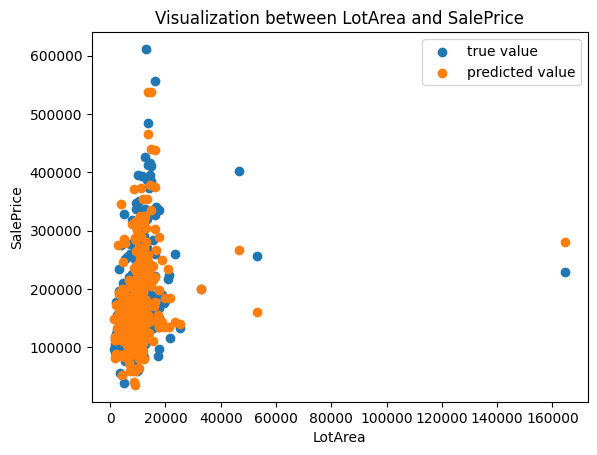

In [47]:
plot_graph('LotArea', 'SalePrice', X_test[:, 2], y_test, d_tree_predict)

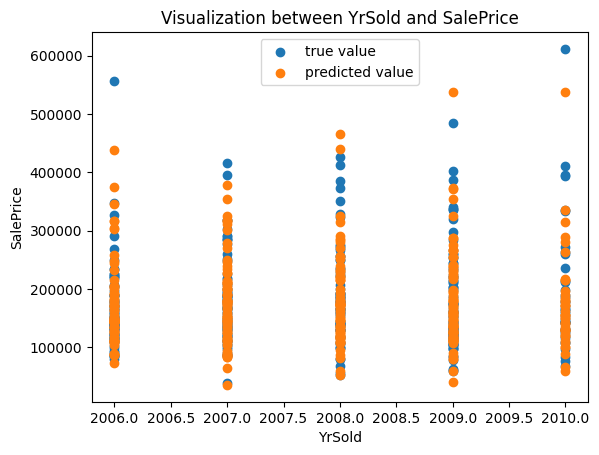

In [48]:
plot_graph('YrSold', 'SalePrice', X_test[:, 3], y_test, d_tree_predict)

#### Random forest

In [49]:
rand_forest = RandomForestRegressor()
rand_forest.fit(X_train, y_train)
rand_forest_predict = rand_forest.predict(X_test)
print("Mean Squared Error: ",mean_squared_error(y_test, rand_forest_predict))

Mean Squared Error:  1243193508.44463


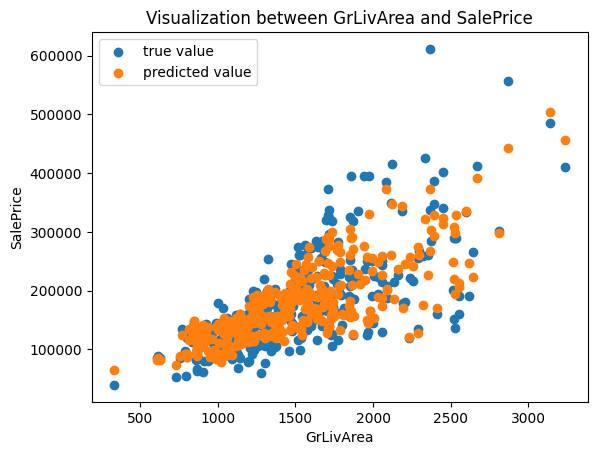

In [50]:
plot_graph('GrLivArea', 'SalePrice', X_test[:, 0], y_test, rand_forest_predict)

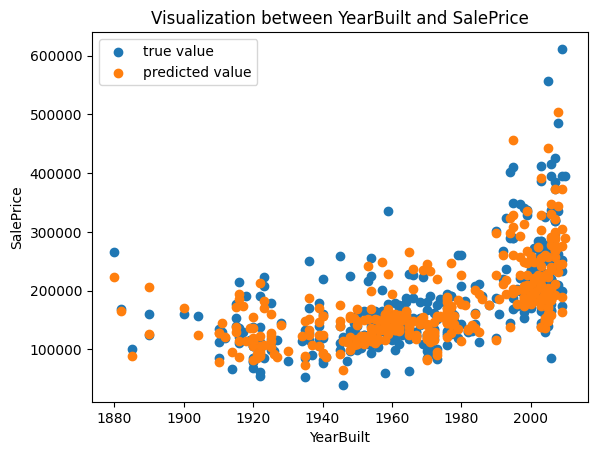

In [51]:
plot_graph('YearBuilt', 'SalePrice', X_test[:, 1], y_test, rand_forest_predict)

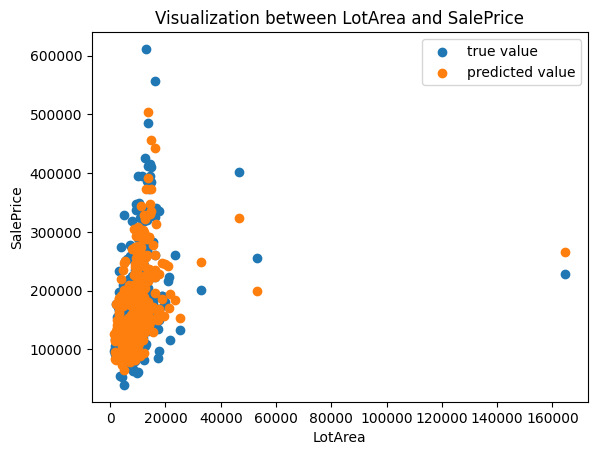

In [52]:
plot_graph('LotArea', 'SalePrice', X_test[:, 2], y_test, rand_forest_predict)

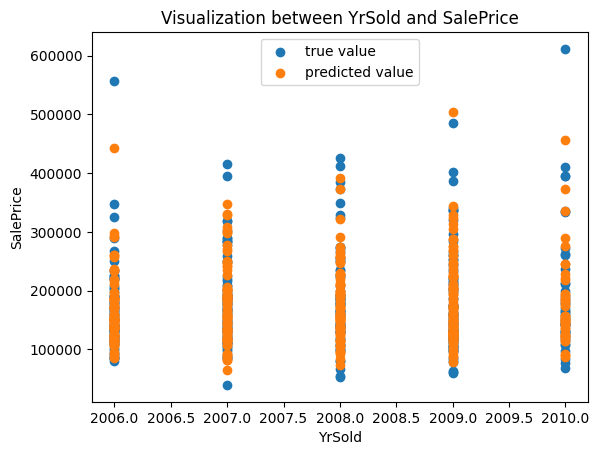

In [53]:
plot_graph('YrSold', 'SalePrice', X_test[:, 3], y_test, rand_forest_predict)